In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import root_mean_squared_error, mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

import calendar

Exploratory Data Analysis

In [87]:
df = pd.read_csv("top250_anime.csv")
df.head()

,Rank,Title,Popularity,Genre,Studio,Type,Episodes,Duration,Start_date,End_date,Members,Score
0,1,Shingeki no Kyojin: The Final Season - Kankets...,609,"Action, Drama, Suspense",MAPPA,Special,2.0,61,23-Mar,2023,347875.0,9.17
1,2,Fullmetal Alchemist: Brotherhood,3,"Action, Adventure, Drama, Fantasy",Bones,TV,64.0,24,9-Apr,10-Jul,3109951.0,9.11
2,3,Bleach: Sennen Kessen-hen,508,"Action, Adventure, Fantasy",Pierrot,TV,13.0,24,22-Oct,22-Dec,404036.0,9.09
3,4,Steins;Gate,13,"Drama, Sci-Fi, Suspense",White Fox,TV,24.0,24,11-Apr,11-Sep,2393767.0,9.08
4,5,Gintama°,335,"Action, Comedy, Sci-Fi",Bandai Namco Pictures,TV,51.0,24,15-Apr,16-Mar,581994.0,9.07


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        250 non-null    int64  
 1   Title       250 non-null    object 
 2   Popularity  250 non-null    int64  
 3   Genre       249 non-null    object 
 4   Studio      248 non-null    object 
 5   Type        250 non-null    object 
 6   Episodes    249 non-null    float64
 7   Duration    250 non-null    int64  
 8   Start_date  250 non-null    object 
 9   End_date    248 non-null    object 
 10  Members     248 non-null    float64
 11  Score       250 non-null    float64
dtypes: float64(3), int64(3), object(6)
memory usage: 23.6+ KB


In [89]:
df.isnull()

,Rank,Title,Popularity,Genre,Studio,Type,Episodes,Duration,Start_date,End_date,Members,Score
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
245,False,False,False,False,False,False,False,False,False,False,False,False
246,False,False,False,False,False,False,False,False,False,False,False,False
247,False,False,False,False,False,False,False,False,False,False,False,False
248,False,False,False,False,False,False,False,False,False,False,False,False


In [90]:
df.describe()

,Rank,Popularity,Episodes,Duration,Members,Score
count,250.000000,250.000000,249.000000,250.000000,2.480000e+02,250.000000
mean,125.500000,855.460000,17.791165,41.720000,6.642592e+05,8.546680
std,72.312977,1009.330929,23.988668,35.677178,6.847809e+05,0.206665
min,1.000000,1.000000,1.000000,3.000000,1.056600e+04,8.290000
25%,63.250000,178.250000,1.000000,23.000000,1.899975e+05,8.380000
50%,125.500000,490.000000,12.000000,24.000000,4.154550e+05,8.505000
75%,187.750000,1139.000000,24.000000,29.000000,8.616745e+05,8.660000
max,250.000000,5794.000000,201.000000,161.000000,3.673536e+06,9.170000


In [91]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
245    False
246    False
247    False
248    False
249    False
Length: 250, dtype: bool

In [92]:
df.nunique()

Rank          250
Title         250
Popularity    250
Genre         113
Studio         76
Type            6
Episodes       41
Duration       59
Start_date    132
End_date      149
Members       248
Score          70
dtype: int64

Data Cleaning

In [93]:
df.dropna(inplace= True)
df.drop_duplicates(inplace= True)

Feature Engineering

In [94]:
df['Start_date'] = df['Start_date'].astype(str)
df['End_date'] = df['End_date'].astype(str)

df['Start_date_fixed'] = df['Start_date'] + '-2023'
df['End_date_fixed'] = df['End_date'] + '-2023'
#Add a default year to dates

In [95]:
df['Start_date_DT'] = pd.to_datetime(df['Start_date_fixed'], format='%d-%b-%Y', errors='coerce')
df['End_date_DT'] = pd.to_datetime(df['End_date_fixed'], format='%d-%b-%Y', errors='coerce')

#Transform str to date

In [96]:
print(df['Start_date_DT'].isnull().sum())
print(df['End_date_DT'].isnull().sum())

20
19


In [97]:
median_date = df['Start_date_DT'].median()
print(median_date)
median_date_E = df['End_date_DT'].median()
print(median_date)

df['Start_date_DT'] = df['Start_date_DT'].fillna(median_date)
df['End_date_DT'] = df['End_date_DT'].fillna(median_date_E)

#Fill NaT Values

2023-07-09 00:00:00
2023-07-09 00:00:00


In [98]:
df['Start_month'] = df['Start_date_DT'].dt.month
df['End_month'] = df['End_date_DT'].dt.month

In [99]:
df['Start_month_name'] = df['Start_month'].apply(lambda x: calendar.month_name[x])
df['End_month_name'] = df['End_month'].apply(lambda x: calendar.month_name[x])
df['Start_month_name']= df['Start_month'].apply(lambda x: calendar.month_name[x])

In [100]:
numeric_cols = df.select_dtypes(include='number').columns
sdc = StandardScaler()

df[numeric_cols] = sdc.fit_transform(df[numeric_cols])

Data Visualization Analysis

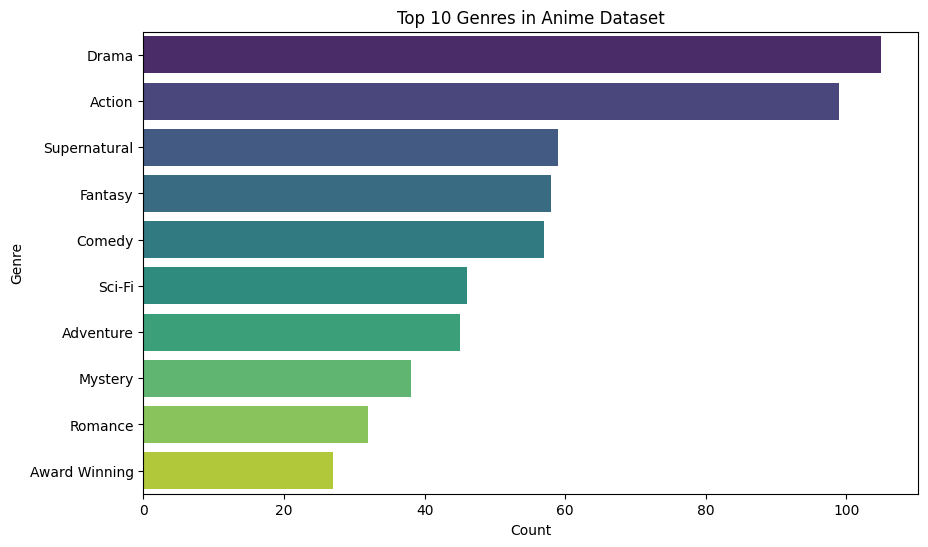

In [101]:
#Top Genres
all_genres = df['Genre'].str.split(', ').explode()

top_genres = all_genres.value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x= top_genres.values, y=top_genres.index, hue=top_genres.index, dodge=False, palette='viridis', legend=False)
plt.title('Top 10 Genres in Anime Dataset')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

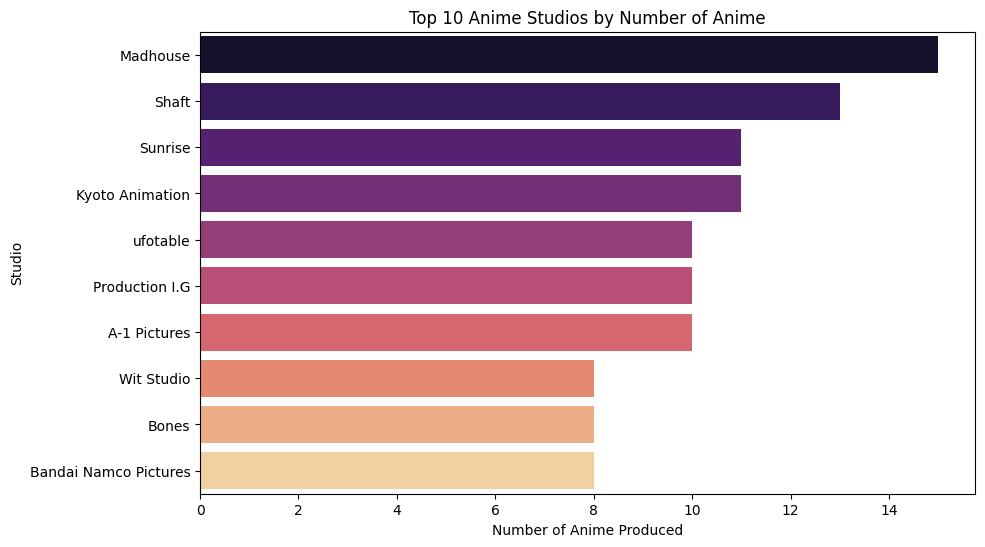

In [102]:
#Top Studios

top_studios = df['Studio'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x= top_studios.values, y= top_studios.index, palette= 'magma', hue= top_studios.index, dodge=False, legend=False)
plt.title('Top 10 Anime Studios by Number of Anime')
plt.xlabel('Number of Anime Produced')
plt.ylabel('Studio')
plt.show()

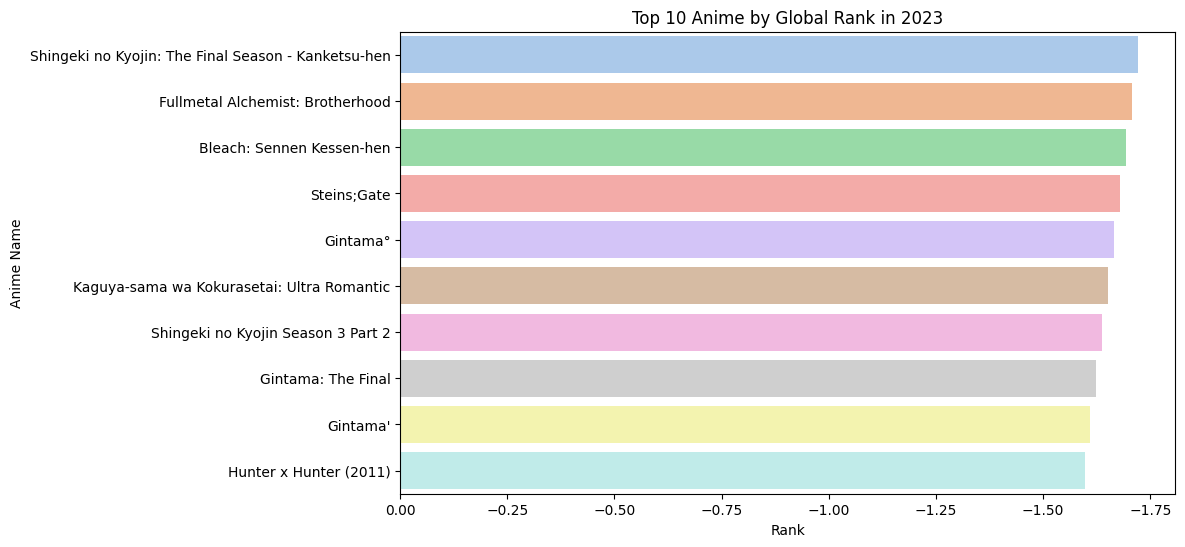

In [103]:
df_ranked = df[df['Rank'].notna() & df['Title'].notna()]
top_ranked = df_ranked.sort_values('Rank').head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Rank', y='Title', data=top_ranked, palette='pastel', hue= 'Title', dodge=False, legend=False)

plt.title('Top 10 Anime by Global Rank in 2023')
plt.xlabel('Rank')
plt.ylabel('Anime Name')
plt.gca().invert_xaxis()  #Transform rank 1 to left
plt.show()


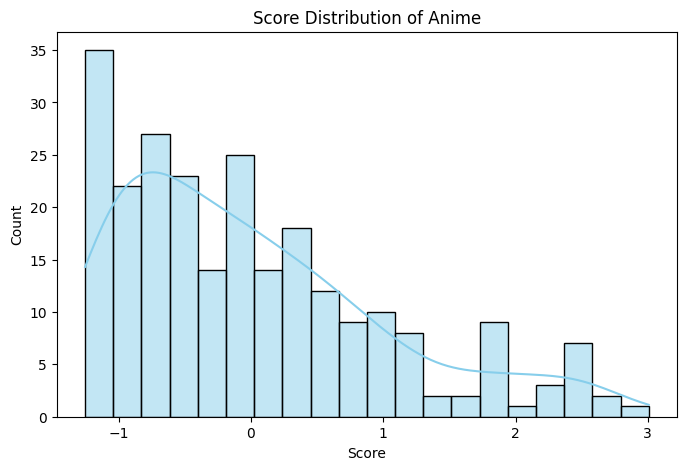

In [104]:
#Score Distribution

plt.figure(figsize=(8,5))
sns.histplot(df['Score'].dropna(), bins=20, kde=True, color='skyblue')
plt.title('Score Distribution of Anime')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()


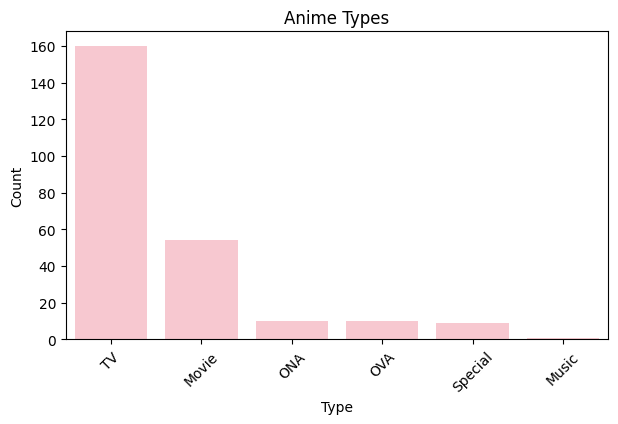

In [105]:
#Anime Types

plt.figure(figsize=(7,4))
sns.countplot(data=df, x='Type', order=df['Type'].value_counts().index, color= 'Pink')
plt.title('Anime Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Popularity VS Score')

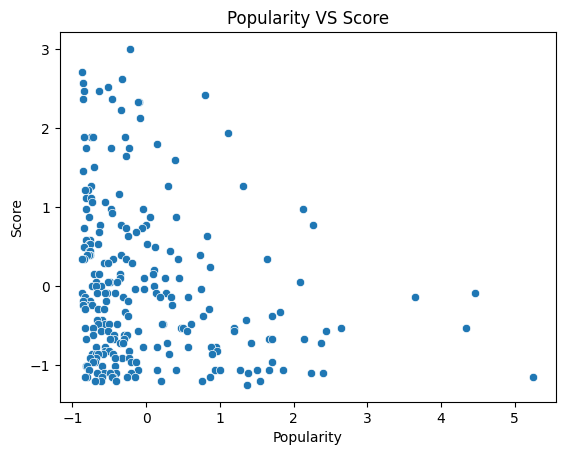

In [106]:
sns.scatterplot(x='Popularity', y='Score', data= df)
plt.title("Popularity VS Score")

In [107]:
df

,Rank,Title,Popularity,Genre,Studio,Type,Episodes,Duration,Start_date,End_date,Members,Score,Start_date_fixed,End_date_fixed,Start_date_DT,End_date_DT,Start_month,End_month,Start_month_name,End_month_name
0,-1.721935,Shingeki no Kyojin: The Final Season - Kankets...,-0.223871,"Action, Drama, Suspense",MAPPA,Special,-0.663773,0.520295,23-Mar,2023,-0.466265,3.006944,23-Mar-2023,2023-2023,2023-03-23,2023-07-10,-0.925965,0.060854,March,July
1,-1.708005,Fullmetal Alchemist: Brotherhood,-0.863914,"Action, Adventure, Drama, Fantasy",Bones,TV,1.908348,-0.515248,9-Apr,10-Jul,3.596006,2.716448,9-Apr-2023,10-Jul-2023,2023-04-09,2023-07-10,-0.631394,0.060854,April,July
2,-1.694075,Bleach: Sennen Kessen-hen,-0.330544,"Action, Adventure, Fantasy",Pierrot,TV,-0.207429,-0.515248,22-Oct,22-Dec,-0.383667,2.619617,22-Oct-2023,22-Dec-2023,2023-10-22,2023-12-22,1.136027,1.576006,October,December
3,-1.680144,Steins;Gate,-0.853352,"Drama, Sci-Fi, Suspense",White Fox,TV,0.248915,-0.515248,11-Apr,11-Sep,2.542692,2.571201,11-Apr-2023,11-Sep-2023,2023-04-11,2023-09-11,-0.631394,0.666915,April,September
4,-1.666214,Gintama°,-0.513263,"Action, Comedy, Sci-Fi",Bandai Namco Pictures,TV,1.369032,-0.515248,15-Apr,16-Mar,-0.121939,2.522785,15-Apr-2023,16-Mar-2023,2023-04-15,2023-03-16,-0.631394,-1.151267,April,March
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,1.690992,Blue Lock,-0.403421,Sports,8bit,TV,0.248915,-0.515248,22-Oct,23-Mar,-0.302203,-1.205238,22-Oct-2023,23-Mar-2023,2023-10-22,2023-03-23,1.136027,-1.151267,October,March
246,1.704922,Detective Conan Movie 06: The Phantom of Baker...,1.550507,"Adventure, Mystery",TMS Entertainment,Movie,-0.705259,1.807727,2-Apr,2-Apr,-0.869816,-1.205238,2-Apr-2023,2-Apr-2023,2023-04-02,2023-04-02,-0.631394,-0.848236,April,April
247,1.718852,Diamond no Ace: Second Season,0.760486,Sports,"Production I.G, Madhouse",TV,1.369032,-0.515248,15-Apr,16-Mar,-0.786147,-1.205238,15-Apr-2023,16-Mar-2023,2023-04-15,2023-03-16,-0.631394,-1.151267,April,March
248,1.732783,Hibike! Euphonium 2,0.207050,Drama,Kyoto Animation,TV,-0.207429,-0.543236,16-Oct,16-Dec,-0.663590,-1.205238,16-Oct-2023,16-Dec-2023,2023-10-16,2023-12-16,1.136027,1.576006,October,December


Model Fitting Function

In [121]:
def model(m, x_raw, y, df_original, cat_features):
    
    
    numeric_features = [col for col in x_raw.columns if col not in cat_features]

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numeric_features),
            ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
        ]
    )

    pipe = Pipeline(steps=[
        ('preprocess', preprocessor),
        ('model', m)
    ])
    
    x_train, x_test, y_train, y_test = train_test_split(x_raw, y, test_size=0.2, random_state=42)
    
    if isinstance(m, RandomForestRegressor):
        param_grid = {
            'model__n_estimators': [50, 100, 200],
            'model__max_depth': [None, 5, 10]
        }
        
        grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_root_mean_squared_error')
        grid_search.fit(x_train, y_train)
        print(f"Best params: {grid_search.best_params_}")
        print(f"Best RMSE: {-grid_search.best_score_:.4f}")
        
    elif isinstance(m, KNeighborsRegressor):
        param_grid = {
            'model__n_neighbors': [3, 5, 7, 9],
            'model__weights': ['uniform', 'distance'],
            'model__metric': ['euclidean', 'manhattan']
        }

        
        grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_root_mean_squared_error')
        grid_search.fit(x_train, y_train)
        print(f"Best params: {grid_search.best_params_}")
        print(f"Best RMSE: {-grid_search.best_score_:.4f}")
        
    elif isinstance(m, SVR):
        param_grid = {
            'model__C': [0.1, 1, 10, 100],
            'model__kernel': ['linear', 'rbf', 'poly'],
            'model__gamma': ['scale', 'auto']
        }
        
        grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_root_mean_squared_error')
        grid_search.fit(x_train, y_train)
        print(f"Best params: {grid_search.best_params_}")
        print(f"Best RMSE: {-grid_search.best_score_:.4f}")
        
    else:
        print("No grid search")
    
    
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(x_test)
    rmse_test = mean_squared_error(y_test, y_pred)
    print(f"Test RMSE: {rmse_test:.4f}")
    
    test_rank = np.linspace(df_original['Rank'].min(), df_original['Rank'].max(), 100).reshape(-1, 1)

    fake_raw = pd.DataFrame(np.tile(x_raw.mean(numeric_only=True).values, (100, 1)), columns=numeric_features)
    fake_raw['Rank'] = test_rank[:, 0]

    for col in cat_features:
            fake_raw[col] = x_raw[col].mode()[0]  

   
    outputs = best_model.predict(fake_raw)
    plt.figure(figsize=(12, 8))
    sns.scatterplot(x='Rank', y='Score', data=df_original)
    plt.plot(test_rank, outputs, color='red', linewidth=2)
    plt.title("Model Prediction vs Real Data")
    plt.xlabel("Rank")
    plt.ylabel("Score")
    plt.show()
    return(rmse_test)     

In [122]:
cat_features= ['Start_month_name', 'End_month_name', 'Genre', 'Studio', 'Type']
features= cat_features+ ['Rank', 'Duration']
df_original = df[features + ['Score']]
rmse_list = []
model_names= ['RandomForest','KNN', 'SVR']

Fitting Model(RandomForestRegressor)

Best params: {'model__max_depth': None, 'model__n_estimators': 200}
Best RMSE: 0.0408
Test RMSE: 0.0008


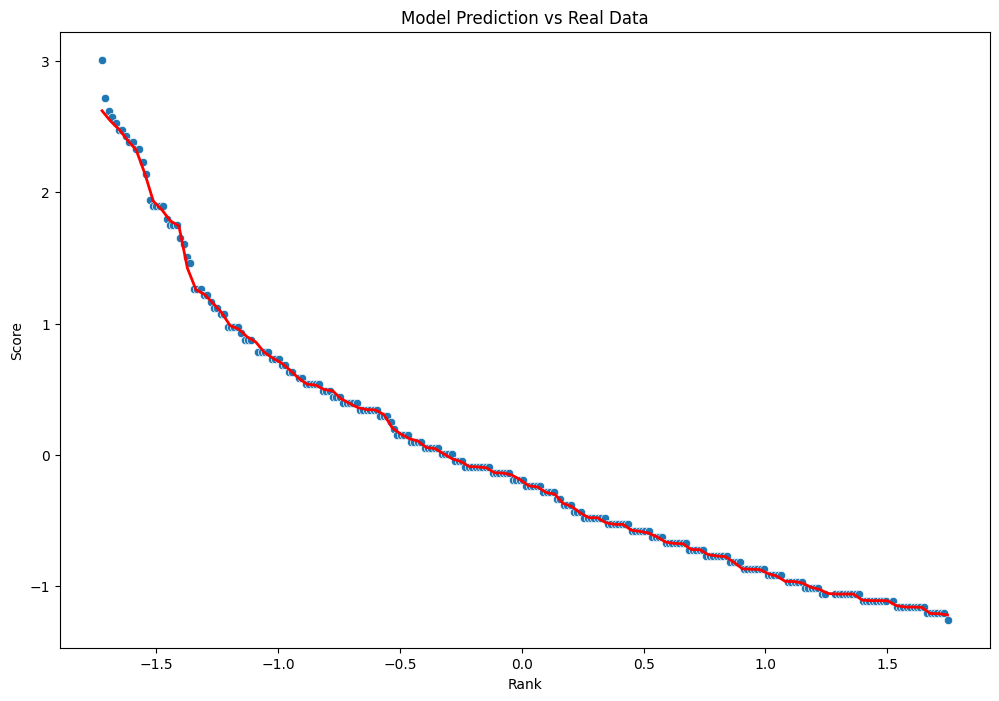

In [123]:
rmse_list.append(model(RandomForestRegressor(), df[features], df['Score'], df_original, cat_features))

Fitting Model(KNeighborsRegressor)

Best params: {'model__metric': 'euclidean', 'model__n_neighbors': 9, 'model__weights': 'distance'}
Best RMSE: 0.3893
Test RMSE: 0.2399


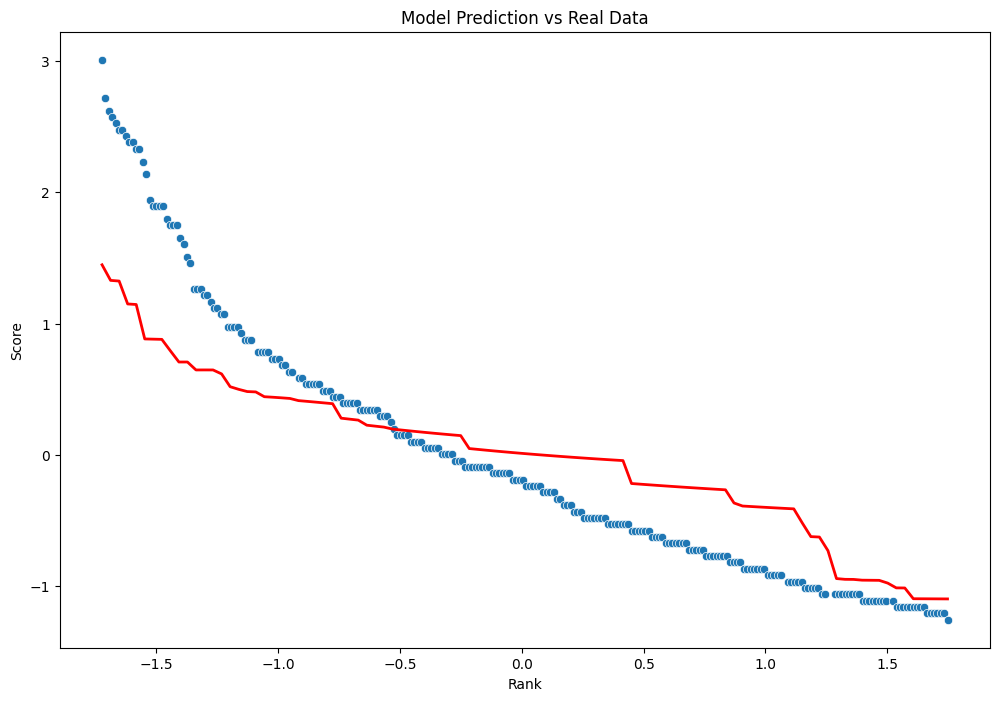

In [124]:
rmse_list.append(model(KNeighborsRegressor(), df[features], df['Score'], df_original, cat_features))

Fitting Model(SVR)

Best params: {'model__C': 100, 'model__gamma': 'scale', 'model__kernel': 'rbf'}
Best RMSE: 0.2905
Test RMSE: 0.0696


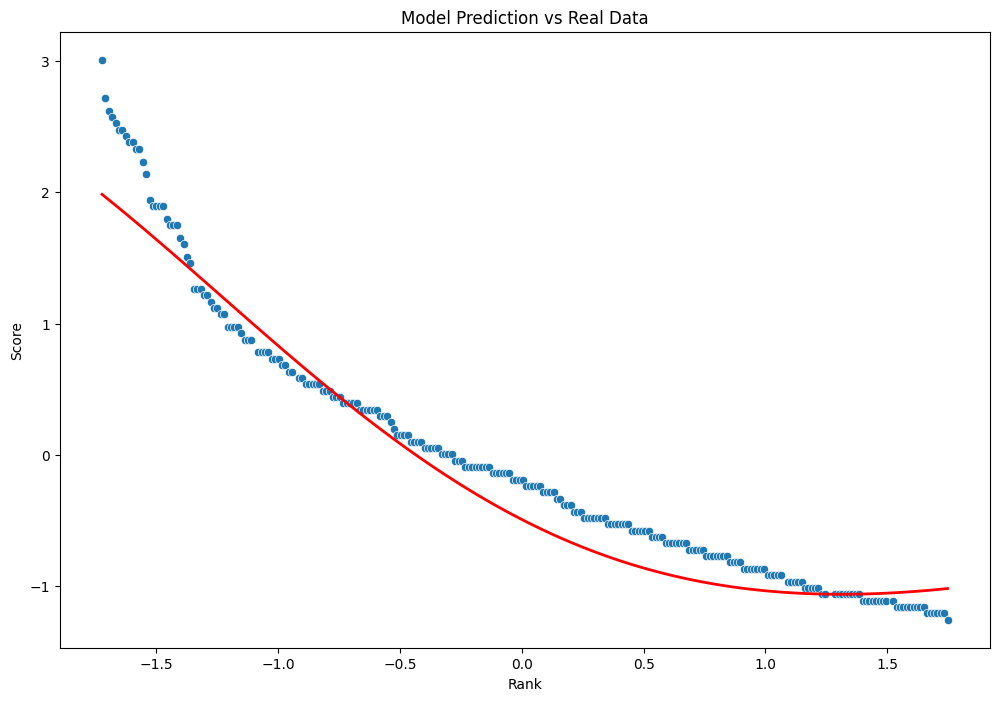

In [125]:
rmse_list.append(model(SVR(), df[features], df['Score'], df_original, cat_features))

Visualization resualts

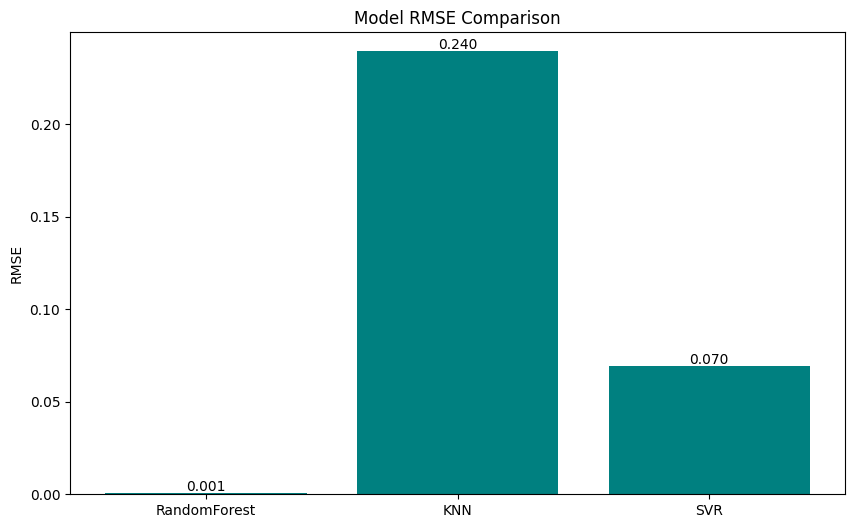

In [127]:
plt.figure(figsize=(10, 6))
plt.bar(model_names, rmse_list, color='teal')
plt.title('Model RMSE Comparison')
plt.ylabel('RMSE')
plt.ylim(0, max(rmse_list)+0.01)

for i, v in enumerate(rmse_list):
    plt.text(i, v + 0.001, f"{v:.3f}", ha='center')
